In [1]:
import pandas as pd

In [74]:
# from Baseball Savant, get weighted sprint speed using TY and LY data
# min pa = 50
def read_sprint_speed(year):
    df = pd.read_csv(f'Sprint Speed {year - 1}-{year}.csv', index_col=False).drop('Unnamed: 6', axis=1)
            
    # for TY data, double its weight
    df['weight'] = 0
    df.loc[df['year'] == year, 'weight'] = 2
    df.loc[df['year'] != year, 'weight'] = 1
    df['weighted_speed'] = df['weight'] * df['sprint_speed']
        
    # calculate the weighted launch angle
    df_grouped = df.groupby(['player_id']).sum()
    df_grouped['sprint_speed'] = df_grouped['weighted_speed'] / df_grouped['weight']
    df_grouped = df_grouped[df_grouped['year'] >= year]
    
    # join with player ids
    player_map = pd.read_csv('../PLAYERIDMAP 2022.csv')[['MLBID', 'PLAYERNAME']].set_index('MLBID')
    merge = df_grouped[['sprint_speed']].merge(player_map, how='left', left_index=True, right_index=True)[['PLAYERNAME', 'sprint_speed']]
    
    return merge

spd_data = read_sprint_speed(2022)
spd_data.head()

,PLAYERNAME,sprint_speed
405395,Albert Pujols,22.533333
408234,Miguel Cabrera,23.366667
425877,Yadier Molina,22.066667
429664,Robinson Cano,24.300000
435559,Kurt Suzuki,24.333333


0.9592592592592593
22.066666666666666


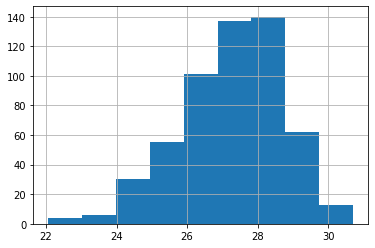

In [82]:
print((spd_data['sprint_speed'].max() - spd_data['sprint_speed'].min()) / 9)
print(spd_data['sprint_speed'].min())
hist = spd_data['sprint_speed'].hist(bins=9)

In [107]:
# CONVERSIONS:
# 4-12
sprint_speed_conversion = {
    5: 23,
    6: 24.9,
    7: 25.8,
    8: 26.7,
    9: 27.6,
    10: 28.5,
    11: 29.4,
    12: 30.3,
}

In [108]:
def get_spd(spd):
    current_spd = 4
    while current_spd < 12:
        floor = sprint_speed_conversion[current_spd + 1]
        if spd > floor:
            current_spd += 1
        else:
            break
    return current_spd

In [109]:
def assign_spd(year):
    spd_data = read_sprint_speed(2022)
    spd_data['Run Speed'] = spd_data.apply(lambda x: get_spd(x['sprint_speed']), axis=1)
    return spd_data[['PLAYERNAME', 'Run Speed']].dropna()

spd_df = assign_spd(2022)
spd_df.head()

,PLAYERNAME,Run Speed
405395,Albert Pujols,4
408234,Miguel Cabrera,5
425877,Yadier Molina,4
429664,Robinson Cano,5
435559,Kurt Suzuki,5


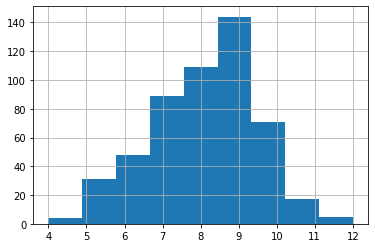

In [110]:
hist2 = spd_df['Run Speed'].hist(bins=9)

In [115]:
spd_df[spd_df['Run Speed'] == 5]

,PLAYERNAME,Run Speed
408234,Miguel Cabrera,5
429664,Robinson Cano,5
435559,Kurt Suzuki,5
455139,Robinson Chirinos,5
474832,Brandon Belt,5
506702,Sandy Leon,5
519222,Austin Romine,5
519317,Giancarlo Stanton,5
542583,Jesus Aguilar,5
547379,Roberto Perez,5


In [116]:
spd_df.to_csv('2022_Run.csv')